<font size="+5">#03 | Machine Learning & Linear Regression</font>

- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Discipline to Search Solutions in Google

> Apply the following steps when **looking for solutions in Google**:
>
> 1. **Necesity**: How to load an Excel in Python?
> 2. **Search in Google**: by keywords
>   - `load excel python`
>   - ~~how to load excel in python~~
> 3. **Solution**: What's the `function()` that loads an Excel in Python?
>   - A Function to Programming is what the Atom to Phisics.
>   - Every time you want to do something in programming
>   - **You will need a `function()`** to make it
>   - Theferore, you must **detect parenthesis `()`**
>   - Out of all the words that you see in a website
>   - Because they indicate the presence of a `function()`.

# Load the Data

> By running the following commands:

```python
import seaborn as sns
sns.get_dataset_names()
```

> You'll observe a list of posible `tables` that we could work with.
> You may use whichever you'd like.
> Just substitue `?` by the name of the dataset you want.

```python
sns.load_dataset(name=?)
```

In [1]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05


# `LinearRegression()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

### Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variable**
> 2. `y`: **target varaible**
> It's recommended that you make a `Data Visualization`
>
> - To analyze if the two variables are related?
> - i.e., do you think `X` variable is good to predict `y`?
> - If so, the Linear Regression would be great!

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

### Scatterplot with Variables from DataFrame

> You may observe in the plot that the points could be related through a line.
>
> Otherwise, you may select another pair of variables.

In [3]:
df.corr().style.background_gradient(cmap='coolwarm')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

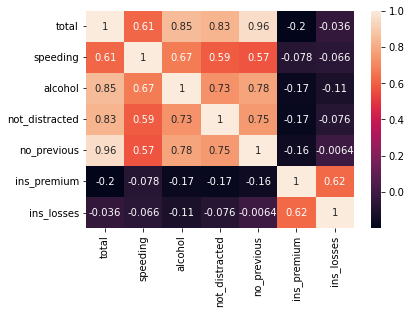

In [4]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='alcohol', ylabel='ins_premium'>

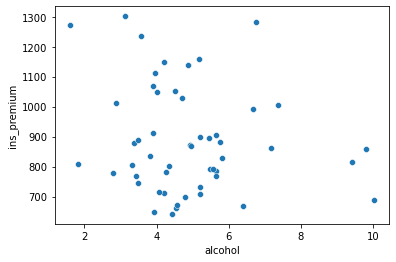

In [5]:
sns.scatterplot(x='alcohol', y='ins_premium', data=df)

<AxesSubplot:xlabel='no_previous', ylabel='total'>

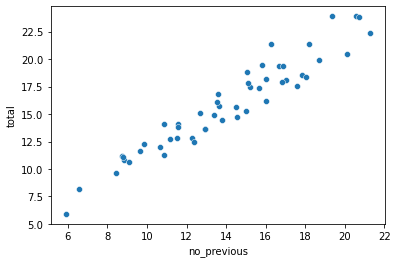

In [6]:
sns.scatterplot(x="no_previous", y="total", data=df)

In [7]:
target = df.total
explanatory = df [["no_previous"]]

In [8]:
dfsel = df[['no_previous', 'total']].copy()
dfsel.head(5)

,no_previous,total
abbrev,,
AL,15.040,18.8
AK,17.014,18.1
AZ,17.856,18.6
AR,21.280,22.4
CA,10.680,12.0


### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

# Model Interpretation

> 1. Especify the **mathematical equation** of the model.
> 2. **Interpret the coefficients** from the equation.

In [9]:
model_linear_regression = LinearRegression()

In [10]:
model_linear_regression.fit(X=explanatory, y=target)

LinearRegression()

In [11]:
#Con esto sabemos la formula de prediction
model_linear_regression.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([1.04693656]),
 '_residues': 72.82418337046256,
 'rank_': 1,
 'singular_': array([26.62025029]),
 'intercept_': 1.1279727489307998}

In [12]:
##accidents = a + b \cdot alcohol \\
##accidents = 1.12 + 1.04 \cdot alcohol

In [13]:
from sklearn.svm import SVC

In [14]:
dfsel['pred_lr'] = model_linear_regression.predict(X=explanatory)

<AxesSubplot:xlabel='no_previous', ylabel='total'>

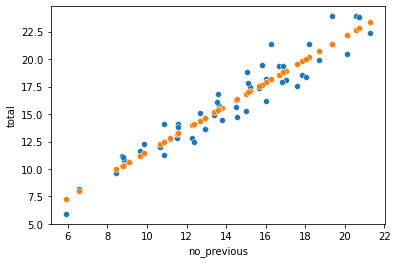

In [15]:
sns.scatterplot(x='no_previous', y='total', data= df)
sns.scatterplot(x='no_previous', y='pred_lr', data= dfsel)

# Calculate Predictions

> - `model.predict()`

In [16]:
dfsel.head()

,no_previous,total,pred_lr
abbrev,,,
AL,15.040,18.8,16.873899
AK,17.014,18.1,18.940551
AZ,17.856,18.6,19.822072
AR,21.280,22.4,23.406783
CA,10.680,12.0,12.309255


In [17]:
model_linear_regression.predict(X =[[1]])

array([2.17490931])

In [18]:
model_linear_regression.predict(X=[[2]])

array([3.22184587])

In [19]:
model_linear_regression.predict(X=[[3]])

array([4.26878242])

# Visualize the Model

> 1. **Real Data**.
> 2. **Model: predictions** calculated with the mathematical equation.

<AxesSubplot:xlabel='no_previous', ylabel='total'>

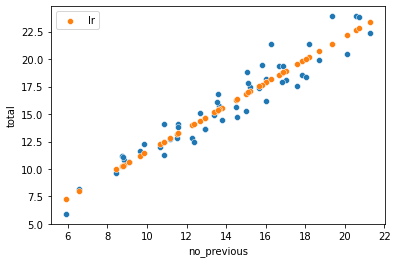

In [20]:
sns.scatterplot(x='no_previous', y='total', data=dfsel)
sns.scatterplot(x='no_previous', y='pred_lr', data=dfsel, label='lr')

# Real vs. Predicted Data

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred_lr'] = predicciones`

> - `df.sample(10)` to check if predictions are equal to reality:

> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [21]:
error = dfsel['total'] - dfsel['pred_lr'] 

In [22]:
error2 = error**2

In [23]:
# rss es los cuadrados sumatorios
rss = error2.sum()
rss

72.8241833704626

In [24]:
tss = ((dfsel.total.mean() - dfsel.total)**2).sum()
tss

849.5450980392156

In [25]:
#Confianza que tiene este modelo
1- (rss/tss)

#O lo que es lo mismo, se puede formular de esta manera
model_linear_regression.score(X=explanatory, y=target)

0.9142786138857799

# "RandomForestRegression()"

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model_random_forest = RandomForestRegressor()

In [28]:
model_random_forest.fit(X=explanatory, y=target)

RandomForestRegressor()

In [29]:
dfsel ["pred_randomforest"]=model_random_forest.predict(X=explanatory)

In [30]:
dfsel.head(5)

,no_previous,total,pred_lr,pred_randomforest
abbrev,,,,
AL,15.040,18.8,16.873899,17.820
AK,17.014,18.1,18.940551,18.474
AZ,17.856,18.6,19.822072,18.609
AR,21.280,22.4,23.406783,22.827
CA,10.680,12.0,12.309255,12.088


In [31]:
model_random_forest.score(X=explanatory, y=target)

0.9780525330049764

# "SVR Support Vector Regression()"

In [32]:
from sklearn.svm import SVR

In [33]:
model_svr = SVR()

In [34]:
model_svr.fit(X=explanatory, y=target)

SVR()

In [35]:
dfsel['pred_svr'] = model_svr.predict(X=explanatory)
dfsel.head(5) 

,no_previous,total,pred_lr,pred_randomforest,pred_svr
abbrev,,,,,
AL,15.040,18.8,16.873899,17.820,16.785796
AK,17.014,18.1,18.940551,18.474,18.524268
AZ,17.856,18.6,19.822072,18.609,19.187136
AR,21.280,22.4,23.406783,22.827,20.161177
CA,10.680,12.0,12.309255,12.088,12.205524


# Comparation Linear Regression - Random Forest - SRV

In [36]:
model_linear_regression.score(X=explanatory, y=target)

0.9142786138857799

In [37]:
model_random_forest.score(X=explanatory, y=target)

0.9780525330049764

In [38]:
model_svr.score(X=explanatory, y=target)

0.8224581045445548

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.